$\rm HI$-to-$\rm H_2$ transition

Estimate far UV radiation field:<br>
from theory (Wolfire et al. 2003) or from observations (Planck dust temperature)

Midplane FUV intensity (relative to sun)<br>
from Wolfire et al. 2003:

In [50]:
import numpy as np
def J_FUV_rel(R,R0,H_R) :
    return np.exp(-(R-R0)/H_R)

In [51]:
J_FUV = J_FUV_rel(12,8.5,4.1) #Wolfire et al. 2003

In [52]:
J_FUV

0.42585407574880685

Probably more of an upper limit, since Maggie is off the plane

In [53]:
########

Estimate metallicity (relative to sun)<br>
from Wolfire et al. 2003 (theory) and Giannetti et al. 2017 (obs.):

In [54]:
#from Wolfire 2003 table 2:
Z_w = 0.668 #for 11kpc Gal. distance

#from Giannetti 2017 Eq.2:
def gas_to_dust(R) :
    return 10**(0.087 * R + 1.44)

In [55]:
gtd = gas_to_dust(12)

In [56]:
gtd

304.7894989627983

In [57]:
#gas to dust ratio at sun's distance:
gtd_sun = 136

In [58]:
#relative gas to dust
gtd_rel = gtd/gtd_sun

In [59]:
#metallicity as inverse of gas to dust:
Z = 1/gtd_rel
print(Z)

0.4462095986338419


Let's go with Giannetti (since at 12kpc and probably lower off the plane)

**Expected transition and $\alpha G$ parameter**

In [60]:
def transition(alpha_G) : #with sigma_g_rel approx. 1
    return 6.71 * np.log((alpha_G/3.2)+1)

def alpha_G(J_FUV, n) : #with sigma_g_rel approx. 1
    return 2.0 * J_FUV * (30/n) * (9.9/1+8.9)**0.37

In [61]:
n = np.arange(0.5,30,0.5)
aG = alpha_G(J_FUV, n)

In [62]:
aG

array([151.31446909,  75.65723455,  50.43815636,  37.82861727,
        30.26289382,  25.21907818,  21.61635273,  18.91430864,
        16.81271879,  15.13144691,  13.75586083,  12.60953909,
        11.63957455,  10.80817636,  10.08763127,   9.45715432,
         8.90085112,   8.40635939,   7.96391943,   7.56572345,
         7.20545091,   6.87793041,   6.57888996,   6.30476955,
         6.05257876,   5.81978727,   5.6042396 ,   5.40408818,
         5.21774031,   5.04381564,   4.88111191,   4.72857716,
         4.58528694,   4.45042556,   4.32327055,   4.2031797 ,
         4.08958025,   3.98195971,   3.87985818,   3.78286173,
         3.69059681,   3.60272545,   3.51894114,   3.43896521,
         3.36254376,   3.28944498,   3.21945679,   3.15238477,
         3.08805039,   3.02628938,   2.96695037,   2.90989364,
         2.85498998,   2.8021198 ,   2.75117217,   2.70204409,
         2.65463981,   2.60887016,   2.56465202])

In [63]:
Sigma_HI = transition(aG)

In [64]:
Sigma_HI

array([26.01558882, 21.50211616, 18.91622728, 17.11800846, 15.75029153,
       14.65403527, 13.74444199, 12.9709268 , 12.30088742, 11.71208482,
       11.18867496, 10.71897464, 10.29412475,  9.90725042,  9.55291168,
        9.22673181,  8.92513862,  8.64517985,  8.3843885 ,  8.14068287,
        7.91229099,  7.69769265,  7.49557437,  7.30479399,  7.12435249,
        6.9533713 ,  6.79107403,  6.63677142,  6.489849  ,  6.34975681,
        6.21600084,  6.08813589,  5.96575936,  5.84850622,  5.73604448,
        5.62807146,  5.52431049,  5.42450811,  5.32843158,  5.23586676,
        5.14661624,  5.06049764,  4.97734222,  4.89699356,  4.81930643,
        4.74414579,  4.67138586,  4.60090936,  4.53260674,  4.46637556,
        4.40211992,  4.3397499 ,  4.27918114,  4.22033433,  4.16313491,
        4.10751266,  4.0534014 ,  4.00073871,  3.94946561])

In [65]:
#rough estimate of the volume density (homogeneously over whole filament width)
n1 = 3.5
n2 = 8.3

In [71]:
aG1 = alpha_G(J_FUV, n1)
aG2 = alpha_G(J_FUV, n2)

HI1 = transition(aG1)
HI2 = transition(aG2)

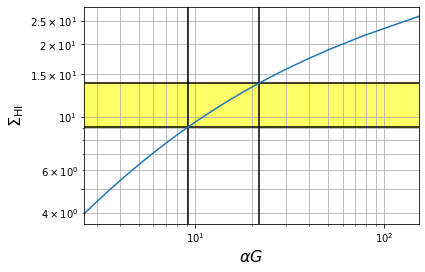

In [79]:
import matplotlib.pyplot as plt
plt.plot(aG,Sigma_HI)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\alpha G$', size=16)
plt.ylabel(r'$\Sigma_{\rm HI}$', size=16)
plt.grid(which='both')
axes = plt.gca()
xlims = axes.get_xlim()
ylims = axes.get_ylim()


plt.vlines(aG1,ylims[0],ylims[1])
plt.vlines(aG2,ylims[0],ylims[1])
plt.hlines(HI1,xlims[0],xlims[1])
plt.hlines(HI2,xlims[0],xlims[1])

yticks = np.arange(5,30,5)
plt.yticks(yticks)
plt.ylim(ylims[0],ylims[1])
plt.xlim(aG.min(),aG.max())

plt.fill_between(aG,HI1,HI2,color='yellow', alpha=0.6)